<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Изучение закономерностей, определяющих успешность игр

**Описание проекта**

Из открытых источников интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Имеются данные до 2016 года. Мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Общая информация о данных

In [2]:
import os

pth1 = 'games.csv'
pth2 = 'datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

Посмотрим на данные

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Переведём названия колонок в нижний регистр

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Количественные столбцы - *year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score*

Категориальные столбцы - *name, platform, genre, rating* 

- *name* — название игры


- *platform* — платформа


- *year_of_release* — год выпуска


- *genre* — жанр игры


- *na_sales* — продажи в Северной Америке (миллионы проданных копий)


- *eu_sales* — продажи в Европе (миллионы проданных копий)


- *jp_sales* — продажи в Японии (миллионы проданных копий)


- *other_sales* — продажи в других странах (миллионы проданных копий)


- *critic_score* — оценка критиков (максимум 100)


- *user_score* — оценка пользователей (максимум 10)


- *rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных.

In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце year_of_release нету данных, скорее всего из-за неточности в данных, т.к. год релиза игры можно узнать в интернете. 

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Год - целое значение.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')

- Обработаем пропуски при необходимости

Пропуски в столбцах:

In [11]:
df[df['name'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1,NaN


Удалим пропуски по этим строкам, т.к. данных сильно не хватает

In [12]:
df.dropna(subset=['name'], inplace=True)

Рассмотрим пустые значения по столбцу critic_score и rating

In [13]:
df[df['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1,NaN


In [14]:
print(df.loc[(df['critic_score'].isnull()) & (
    df['year_of_release'] != -1), 'year_of_release'].min())
print(df.loc[df['critic_score'].isnull(), 'year_of_release'].max())

1980
2016


In [15]:
df[(df['rating'].isnull()) & (df['critic_score'].notnull())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
822,R4: Ridge Racer Type 4,PS,1998,Racing,0.68,0.46,0.79,0.13,88.0,9.2,NaN
1763,Football Manager 2013,PC,2012,Sports,0.00,0.95,0.00,0.21,86.0,6.7,NaN
2054,Monster Rancher,PS,1997,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,NaN
2195,MVP Baseball 2005,XB,2005,Sports,0.70,0.20,0.00,0.03,86.0,-1,NaN
3054,100 Classic Books,DS,2008,Misc,0.12,0.52,0.00,0.02,70.0,6,NaN


Возможно пропуски в столбцах critic_score и rating связаны с тем, что критики и организация ESRB не пробовали играть в эти игры. Оставим эти значения пустыми, чтобы не исказить данные.

- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.

In [16]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score заменим значение tbd на -1, и приведём столбце к целочисленному типу

In [17]:
# df['user_score'] = df['user_score'].replace('tbd', np.nan)
# df['user_score'] = pd.to_numeric(df['user_score'])

df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = pd.to_numeric(df['user_score'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + \
    df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


Данные подготовлены к дальнейшему анализу

Рассмотрим столбец rating

In [20]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Заменим значение K-A на E, т.к. K-A - это первоначальное название

In [21]:
df['rating'] = df['rating'].replace('K-A', 'E')

Уберём строки, где стоят рейтинги EC, RP, AO, т.к. таких значений очень мало 

In [22]:
df = df[~df['rating'].isin(['EC', 'RP', 'AO'])]

In [23]:
df['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
Name: rating, dtype: int64

In [24]:
df['rating'].isna().sum()

6764

Заменим пустые значения на значение 'unknown'

In [25]:
df['rating'] = df['rating'].fillna('unknown')

## Исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество игр за год')

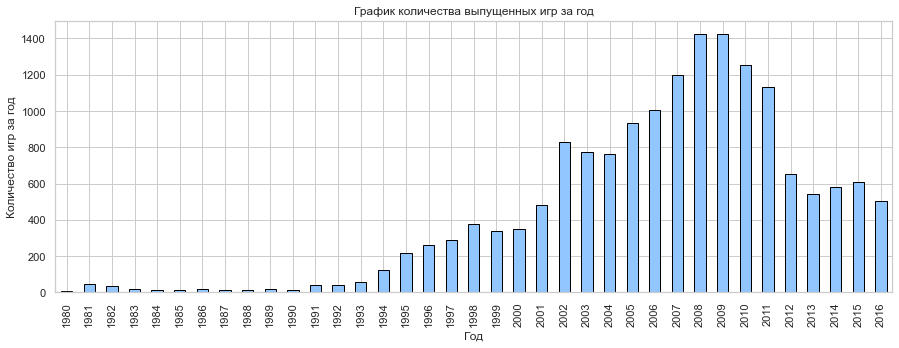

In [26]:
sns.set(style="whitegrid")
plt.style.use('seaborn-pastel')
figsize = (15, 5)
plot = df[df['year_of_release'] > 0].groupby('year_of_release')['name'].count().plot(
    kind='bar', y='name', figsize=figsize, ec='black',  title='График количества выпущенных игр за год')
plot.set_xlabel("Год")
plot.set_ylabel("Количество игр за год")

In [27]:
df_year = df[df['year_of_release'] > 0].groupby(
    'year_of_release')['name'].count().reset_index()

Посмотрим, оценивали ли в разные года игры

Text(0, 0.5, 'Количество оценок критиков за год')

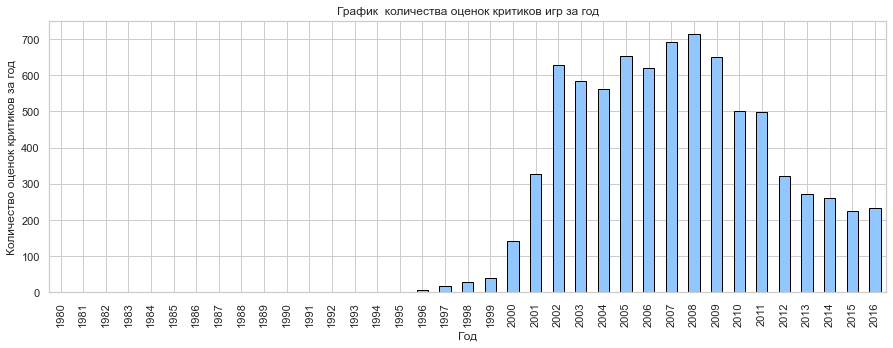

In [28]:
figsize = (15, 5)
plot = df[df['year_of_release'] > 0].groupby('year_of_release')['critic_score'].count().plot(
    kind='bar', y='name', figsize=figsize, ec='black',  title='График  количества оценок критиков игр за год')
plot.set_xlabel("Год")
plot.set_ylabel("Количество оценок критиков за год")

Видим, что критики начали оценивать не сразу.

Отфильтруем значение года в интервал трёх сигм:

In [29]:
def sigma_rule(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[df[column].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR,
                                 inclusive=True)]

In [30]:
# Отфильтровали год
df = sigma_rule(df[(df['year_of_release'] > 0) & (
    df['critic_score'].notnull())], 'year_of_release')

In [31]:
print(df['year_of_release'].min())
print(df['year_of_release'].max())

1996
2016


**Оставим данные с 1996 года**

- Посмотрим, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [32]:
pd.set_option('display.max_rows', None)  # Вывести неограниченное число строк

In [33]:
platform_year = df.pivot_table(
    index=['year_of_release', 'platform'], values='all_sales', aggfunc='sum')
platform_year

all_sales
year_of_release platform           
1996            PC             2.62
                PS            17.73
1997            PC             6.56
                PS            37.22
1998            PC             0.10
                PS            49.35
1999            DC             2.04
                PC             0.11
                PS            52.05
2000            DC             1.98
                PC             3.17
                PS            54.30
                PS2           33.76
                XB             0.99
2001            DC             0.53
                GBA           44.58
                GC            26.34
                PC             5.35
                PS            19.58
                PS2          151.29
                XB            22.01
2002            GBA           37.69
                GC            45.25
                PC             8.55
                PS             0.11
                PS2          174.80
                XB            43.85
2003            GBA           27.22
                GC            38.95
                PC             6.41
                PS2          147.77
                XB            46.29
2004            DS             3.38
                GBA           41.76
                GC            25.76
                PC            10.28
                PS2          190.14
                PSP            4.53
                XB            61.64
2005            DS            97.61
                GBA           12.08
                GC            22.81
                PC             4.00
                PS2          123.20
                PSP           39.35
                X360           7.64
                XB            42.70
2006            DS            75.88
                GBA            3.03
                GC            10.00
                PC             2.56
                PS2           77.86
                PS3           20.12
                PSP           45.67
                Wii          135.95
                X360          48.92
                XB             7.93
2007            DS            89.92
                GBA            0.19
                GC             0.26
                PC             8.91
                PS2           52.46
                PS3           68.72
                PSP           37.77
                Wii          128.28
                X360          90.24
                XB             0.55
2008            DS            78.86
                PC             9.40
                PS2           24.38
                PS3          111.28
                PSP           26.84
                Wii          133.45
                X360         130.07
2009            DS            49.61
                PC            15.52
                PS2            5.28
                PS3          118.90
                PSP           21.11
                Wii          161.29
                X360         111.59
2010            DS            30.73
                PC            20.85
                PS2            0.59
                PS3          126.55
                PSP           17.13
                Wii           74.66
                X360         159.85
2011            3DS           44.72
                DS             7.87
                PC            31.15
                PS3          135.97
                PSP            4.04
                PSV            3.88
                Wii           35.63
                X360         129.95
2012            3DS           39.39
                DS             1.02
                PC            22.01
                PS3           94.30
                PSV           13.07
                Wii           13.23
                WiiU          14.85
                X360          95.68
2013            3DS           15.89
                PC            10.98
                PS3          102.71
                PS4           25.07
                PSP            0.15
                PSV           

Выберем 5 платформ с наибольшими суммарными продажами и построим для каждой успешной платформы график зависимости года к суммарным продажам

In [34]:
best_sales = df.groupby('platform')['all_sales'].sum(
).sort_values(ascending=False).head().reset_index()
best_sales

,platform,all_sales
0,PS2,981.53
1,X360,859.21
2,PS3,789.91
3,Wii,682.49
4,DS,434.88


Построим график продажам игр по годам на этих платформах. Возьмём прошлый датафрейм platform_year.

In [35]:
best_platform_year = platform_year.query(
    'platform in @best_sales.platform').reset_index()

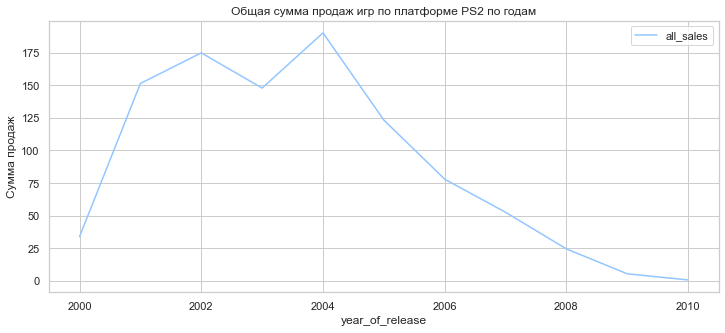

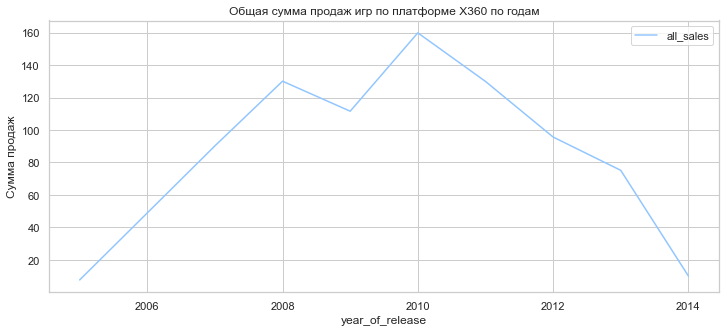

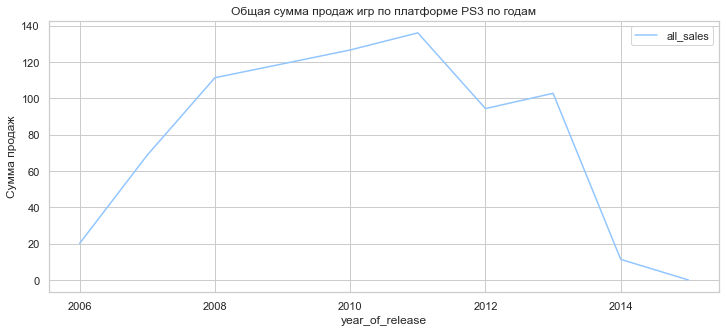

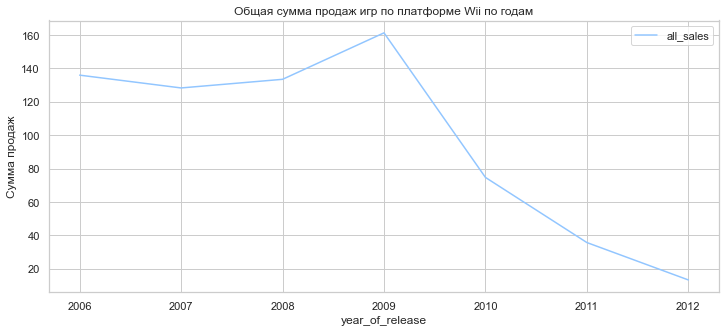

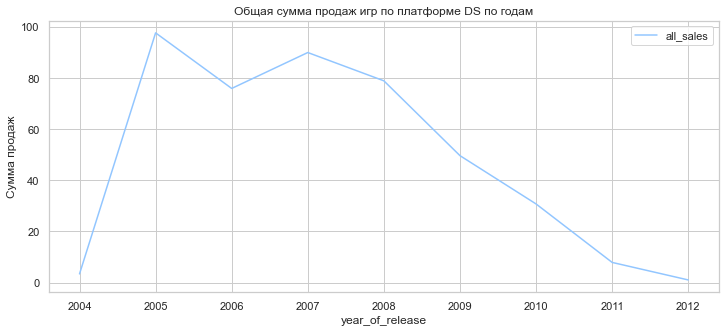

In [36]:
for platform in best_sales['platform'].unique():
    best_platform_year[best_platform_year['platform'] == platform].plot(x='year_of_release', y='all_sales', figsize=(
        12, 5), title='Общая сумма продаж игр по платформе {} по годам'.format(platform))
    plt.ylabel('Сумма продаж')

In [37]:
print(f'Средняя продолжительность жизни платформы исходя из графиков:',
      round((9 + 8 + 8 + 6 + 7)/5))

Средняя продолжительность жизни платформы исходя из графиков: 8


Определим соответствующий актуальный период для прогноза на 2017 год

Рассмотрим продажи игр с 2014 года, т.к. консоли 8-ого поколения появились с 2014-ого года

In [38]:
df_actual = df[df['year_of_release'] >= 2014]
platform_year = platform_year.reset_index()
platform_year = platform_year[platform_year['year_of_release'] >= 2014]

In [39]:
best_actual_sales = df_actual.groupby('platform')['all_sales'].sum(
).sort_values(ascending=False).reset_index()
best_actual_sales

,platform,all_sales
0,PS4,219.42
1,XOne,115.48
2,WiiU,34.02
3,3DS,24.43
4,PC,23.86
5,PS3,11.36
6,X360,10.10
7,PSV,8.03


In [40]:
best_platform_year = platform_year.query(
    'platform in @best_actual_sales.platform').reset_index()

Text(0.5, 1.0, 'Количество продаж у популярных платформ по последним годам')

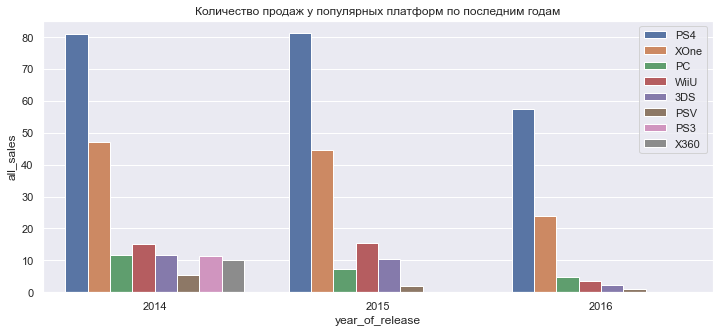

In [41]:
sns.set(rc={'figure.figsize': (12, 5)})
sns.barplot(x="year_of_release", y="all_sales", hue="platform",
            data=best_platform_year.sort_values(by=['year_of_release', 'all_sales'], ascending=False))
plt.legend(loc='upper right')
plt.title('Количество продаж у популярных платформ по последним годам')

Видим, что самые большие продажи на 2016 год остались по платформам PS4, XOne и PC. Это и есть самые потенциально прибыльные платформы. Почти все остальные платформы приблизились к 0 по продажам на 2016 год. Платформы PSV, WiiU и X360 добавлять не будем в список потенциально прибыльных платформ.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Для этого создадим датафрейм, у которого в столбцах будут данные об общих продажах по одной определённой платформе

In [42]:
df_actual.platform.unique()

array(['PS4', 'WiiU', 'XOne', '3DS', 'PC', 'X360', 'PS3', 'PSV'],
      dtype=object)

In [43]:
df_list = []
for platform in ['PS4', 'XOne', 'PC']:
    df_list.append(pd.DataFrame(
        df_actual.loc[df_actual['platform'] == platform]['all_sales'].reset_index(drop=True)))

In [44]:
df_list[0].head()

,all_sales
0,12.62
1,8.58
2,7.66
3,7.60
4,7.17


In [45]:
df_platf_2 = pd.concat([df_list[0], df_list[1]], axis=1)
df_platf_3 = pd.concat([df_platf_2, df_list[2]], axis=1)
df_platf_3.columns = ['PS4', 'XOne', 'PC']

In [46]:
df_platf_3.head()

,PS4,XOne,PC
0,12.62,5.47,3.05
1,8.58,5.26,1.28
2,7.66,4.49,1.17
3,7.60,4.22,0.90
4,7.17,3.50,0.73


In [47]:
# убрать warning
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
matplotlib_axes_logger.setLevel('ERROR')
pd.options.mode.chained_assignment = None

Text(0, 0.5, 'Общие продажи игр')

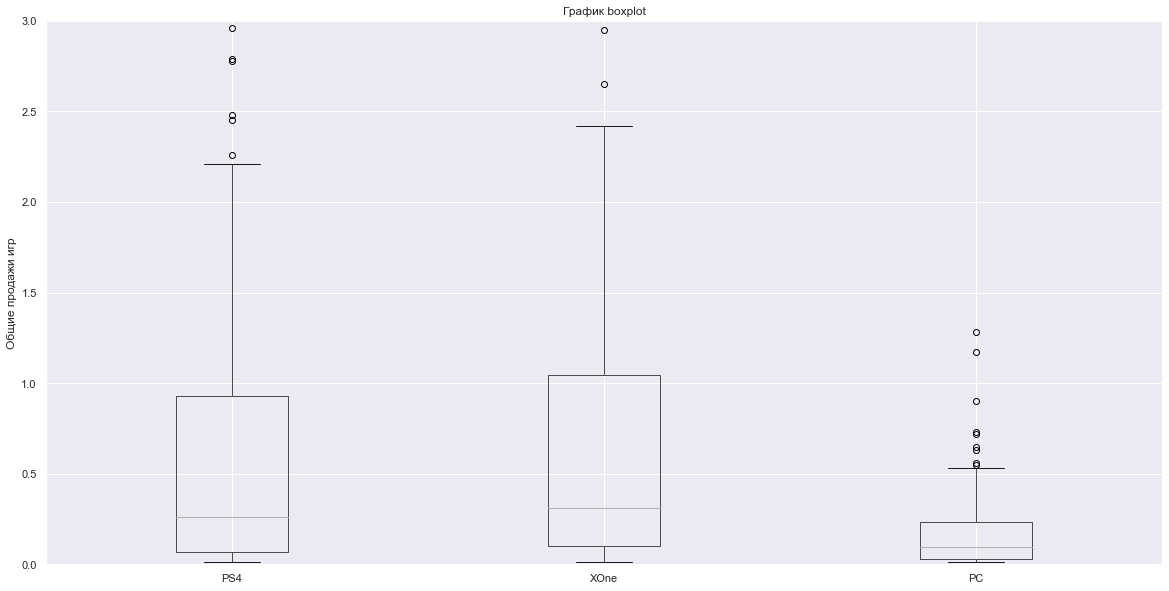

In [48]:
df_platf_3.boxplot(figsize=(20, 10))
plt.ylim(0, 3)
plt.title('График boxplot')
plt.ylabel('Общие продажи игр')

Видим, что графики по PS4 и XOne похожи. Медианы, значение Q1 и значение Q3 примерно равны, т.к. консоли выпускают похожие игры, но иногда одна или другая платформа выпускает эксклюзивы. Q3 + 1.5 * IQR у Xone выше, это говорит о там, что у Xone общая сумма продаж по очень прибыльным играм больше.

Медиана у PC находится очень близко к первому квартилю, это говорит о том, что больше половины игр не принесли особой прибыли. Это связано, с тем что маломасштабные игры можно легко выпускать на PC. Также из графика видно, что стоимость игр у PC меньше, чем у других популярных платформ, но возможно это связано с количеством выпущенных игр.

- Выберем платформу PS4 и посмотрим, как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния

Нормируем параметр critic_score

In [49]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [50]:
df_actual.reset_index(drop=True, inplace=True)
df_actual['critic_score'] /= 10

<AxesSubplot:title={'center':'Зависимость общих продаж от оценок пользователей'}, xlabel='user_score', ylabel='all_sales'>

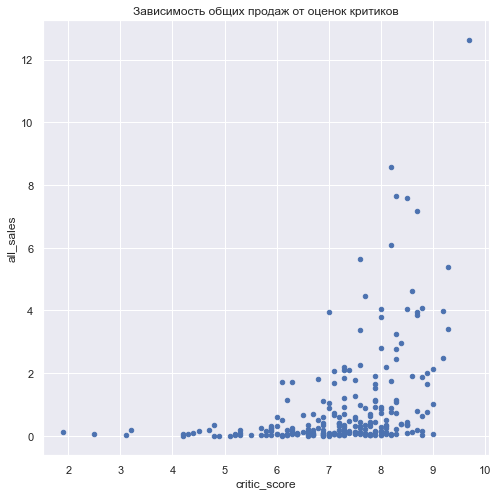

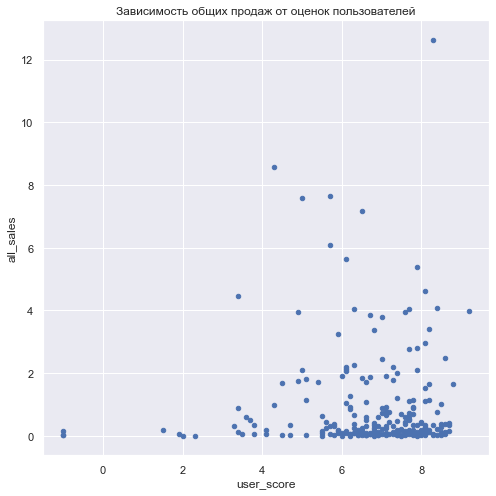

In [51]:
sns.set(rc={'figure.figsize': (8, 8)})
ps4 = df_actual[df_actual['platform'] == 'PS4']
ps4.plot.scatter(x='critic_score', y='all_sales',
                 title='Зависимость общих продаж от оценок критиков')

ps4.plot.scatter(x='user_score', y='all_sales',
                 title='Зависимость общих продаж от оценок пользователей')

Как видим, большинство игр PS4 получили оценки от 5.5 до 9, но продавались не так хорошо, как некоторые другие игры

Посмотрим есть линейная зависимость у оценок пользователей и критиков от всех продаж у PS4, XOne и всех платформ

In [52]:
print(round(ps4['critic_score'].corr(ps4['all_sales']), 2))
print(round(ps4['user_score'].corr(ps4['all_sales']), 2))

0.4
-0.01


In [53]:
xone = df_actual[df_actual['platform'] == 'XOne']
print(round(xone['critic_score'].corr(xone['all_sales']), 2))
print(round(xone['user_score'].corr(xone['all_sales']), 2))

0.43
0.01


In [54]:
print(round(df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4')]['critic_score'].corr(
    df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4')]['all_sales']), 2))

print(round(df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4')]['user_score'].corr(
    df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4')]['all_sales']), 2))

0.22
0.17


Как и следовало ожидать по графику, корреляция показывает среднюю зависимость между оценками критиков и общими продажами. Это связано с тем, что при выпуске игры критики сразу ставят оценку, и если оценка высокая, то пользователи покупают игру в больших количествах.

Зависимости общих продаж от пользовательских оценок не наблюдается.
Также пользователи часто склоны к субъективной оценки, а критики оценивают в совокупности нескольких параметров в том числе и по общим продажам.

Оценки критиков по платформам PS4 и XOne больше связаны с общими продажами, чем по другим платформам. 

- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

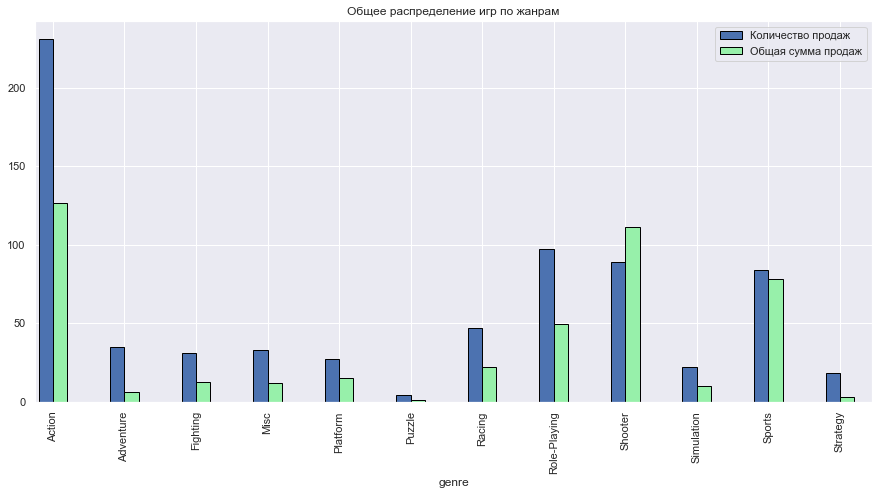

In [55]:
ax = plt.gca()
pivot = df_actual.groupby("genre").agg({'name': 'count', 'all_sales': 'sum'})
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15, 7), ec='black', ax=ax, width=0.2,
           position=1, title='Общее распределение игр по жанрам')

plot2 = pivot['all_sales']
plot2.plot(kind='bar', figsize=(15, 7), ec='black',
           ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Больше всего игр в жанрах Role-Playing и Sports. Меньше всего игр в жанре паззлы.

(Большую среднюю сумму продаж имеют игры в жанре Action.)

Жанр Shooter имеет больше продаж в соотношении с количеством продаж по отношению к другим жанрам.

Очень маленькие показатели по жанру Puzzle.

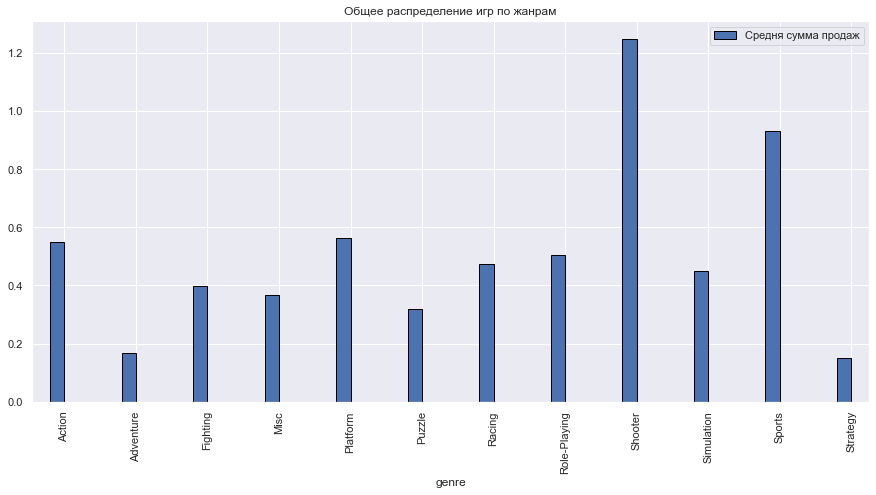

In [56]:
ax = plt.gca()
pivot = df_actual.groupby("genre").agg({'all_sales': 'mean'})
plot1 = pivot['all_sales']
plot1.plot(kind='bar', figsize=(15, 7), ec='black', ax=ax, width=0.2,
           position=1, title='Общее распределение игр по жанрам')


ax.legend(['Средня сумма продаж'])

Самые прибыльный жанр по средним продажам - Shooter, затем идёт Sports. Самый неприбыльный - Adventure.

Таким образом:

- Игры основательно стали оценивать с 1996 года.
- Платформы с наибольшими суммарными продажами за всю историю с 1996 года - PS2, X360, PS3, Wii и DS.
- Средняя продолжительность жизни платформы - 8 лет.
- Самые потенциально прибыльные платформы - PS4, XOne и PC.
- Общие суммы продаж по PS4 и XOne похожи. По PC этот показатель меньше.
- Есть средняя зависимость между оценками критиков и общими продажами игр на платформе PS4.
- Не наблюдается зависимость общих продаж от пользовательских оценок.
- Больше всего игр в жанрах Role-Playing и Sports. Меньше всего игр в жанре паззлы. Большую среднюю сумму продаж имеют игры в жанре Shooter.

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


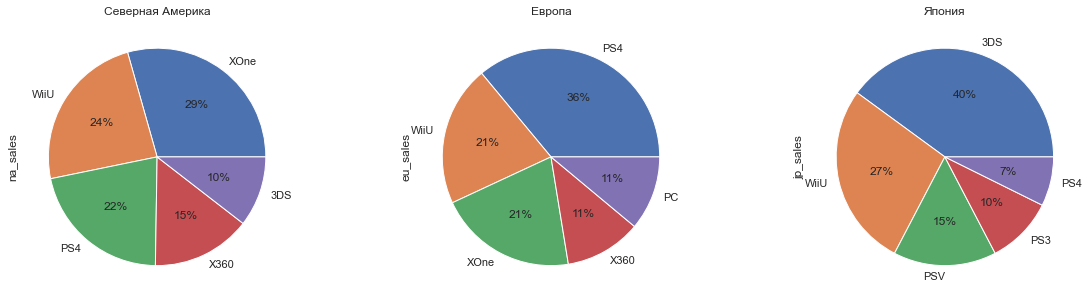

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(40, 6))
na = df_actual.groupby('platform')['na_sales'].mean(
).sort_values(ascending=False).head(5)
na = na/na.sum()
plot = na.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5),
               legend=False, ax=axes[0], title='Северная Америка')

eu = df_actual.groupby('platform')['eu_sales'].mean(
).sort_values(ascending=False).head(5)
eu = eu/eu.sum()
plot = eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
               figsize=(20, 5), legend=False, ax=axes[1], title='Европа')

jp = df_actual.groupby('platform')['jp_sales'].mean(
).sort_values(ascending=False).head(5)
jp = jp/jp.sum()
plot = jp.plot(kind='pie', autopct='%1.0f%%', figsize=(
    20, 5), legend=False, ax=axes[2], title='Япония')

Жители Северной Америки, как и Европы предпочитают консоли XOne, WiiU и PS4.

Жители Японии больше средств потратили на игры платформ 3DS, WiiU и PSV. Отметим, что 3DS и WiiU производит японская компания Nintendo.

- Самые популярные жанры (топ-5)

<AxesSubplot:title={'center':'Япония'}, ylabel='jp_sales'>

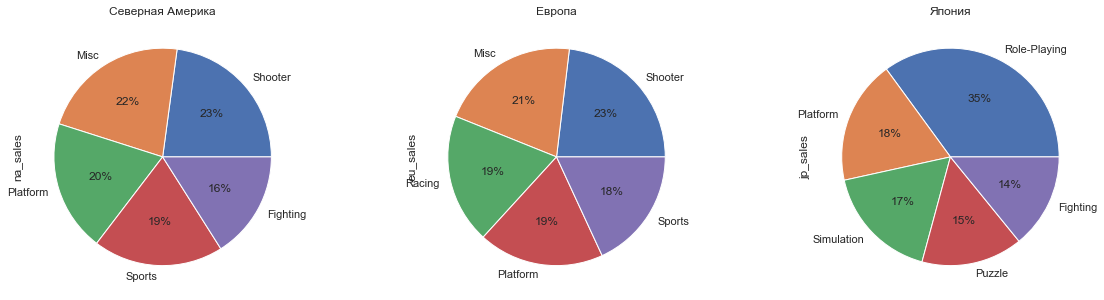

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(40, 6))
na = df.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head(5)
na = na/na.sum()
na.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[0], title='Северная Америка')

eu = df.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head(5)
eu = eu/eu.sum()
eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[1], title='Европа')

jp = df.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head(5)
jp = jp/jp.sum()
jp.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[2], title='Япония')

Для Северной Америки больший интерес представляют жанры Shooter, Misc и Platform.

Похожие характеристики имеют пользователи из Европы, только вместо Platform больший интерес представляют гонки.

Жители Японии больше предпочитают ролевые игры. Также у них выделяется жанр паззлы. Возможно, это связано с большим интересом жителей Японии к аниме.

- Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [59]:
df.groupby('rating')['na_sales'].mean().sort_values(ascending = False).head(5)

rating
M          0.498935
E          0.392485
E10+       0.277783
T          0.275300
unknown    0.042099
Name: na_sales, dtype: float64

In [60]:
df.groupby('rating')['eu_sales'].mean().sort_values(ascending = False).head(5)

rating
M          0.321497
E          0.228716
T          0.157186
E10+       0.148412
unknown    0.072840
Name: eu_sales, dtype: float64

In [61]:
df.groupby('rating')['jp_sales'].mean().sort_values(ascending = False).head(5)

rating
E          0.071164
T          0.056154
M          0.042775
E10+       0.036031
unknown    0.031605
Name: jp_sales, dtype: float64

Визуализируем полученные данные

[Text(0, 0.5, 'Cредняя продажа по рейтингу')]

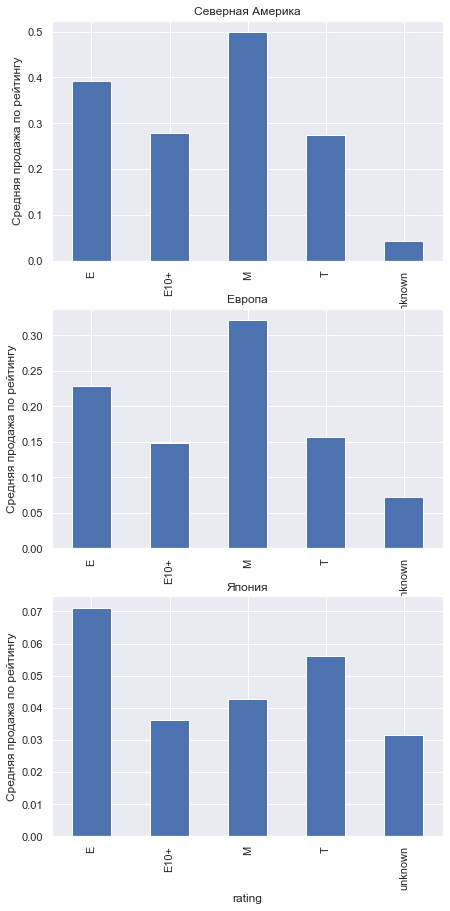

In [62]:
fig, axes = plt.subplots(3, figsize=(7, 15))
na = df.groupby('rating')['na_sales'].mean().head(5)
na.plot(kind='bar', legend=False, title='Северная Америка',
        ax=axes[0]).set(ylabel='Cредняя продажа по рейтингу')

eu = df.groupby('rating')['eu_sales'].mean().head(5)
eu.plot(kind='bar',  legend=False, title='Европа', ax=axes[1]).set(
    ylabel='Cредняя продажа по рейтингу')

jp = df.groupby('rating')['jp_sales'].mean().head(5)
jp.plot(kind='bar',  legend=False,  title='Япония', ax=axes[2]).set(
    ylabel='Cредняя продажа по рейтингу')

Видим, что игры, относящиеся к рейтингу M, означающему "Только для взрослых", в Северной Америке и Европе имеют самые большие продажи, в то время в Японии самый популярный рейтинг - E. Также в Японии в сравнении с Европой и Северной Амеркой выделяются неизвестные значения.

## Проверка гипотез

- Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

In [63]:
df_us = df[df['user_score'] > -1]

In [64]:
print(df_us.loc[df_us['platform'] == 'XOne', 'user_score'].var()) 
print(df_us.loc[df_us['platform'] == 'PC', 'user_score'].var())

1.79639911308204
2.3028254261813634


Воспользуемся Т-критерием, который формирует двусторонний тест для нулевой гипотезы о том, что 2 независимые генеральные совокупности имеют идентичные средние(ожидаемые) значения, c параметром equal_var=False. 

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [65]:
user_score_xone = list(df_us[df_us['platform'] == 'XOne']['user_score'])
user_score_pc = list(df_us[df_us['platform'] == 'PC']['user_score'])

alpha = 0.05

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.4582218242060203e-05
Отвергаем нулевую гипотезу


p-значение: 0.000025 означает, что мы **не** достигли минимум 95% вероятности того, чтобы сказать, что средние пользовательские рейтинги платформ Xbox One и PC равны.

In [66]:
print(df_us[df_us['platform'] == 'XOne']['user_score'].mean())
print(df_us[df_us['platform'] == 'PC']['user_score'].mean())

6.538181818181818
7.050584795321638


Для игр по PC ставят оценку выше, чем на XOne.

- Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

Воспользуемся Т-критерием, который формирует двусторонний тест для нулевой гипотезы о том, что 2 независимые генеральные совокупности имеют идентичные средние(ожидаемые) значения.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [67]:
print(df_us.loc[df_us['genre'] == 'Action', 'user_score'].var()) 
print(df_us.loc[df_us['genre'] == 'Sports', 'user_score'].var())

1.9420806907538943
2.129300835685428


In [68]:
user_score_action = list(df_us[df_us['genre'] == 'Action']['user_score'])
user_score_sports = list(df_us[df_us['genre'] == 'Sports']['user_score'])

alpha = 0.05

results = st.ttest_ind(user_score_action, user_score_sports)
print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9911308438742281
Не получилось отвергнуть нулевую гипотезу


p-значение: 0.99 означает, что мы **достигли** минимум 95% вероятности того, чтобы сказать, что средние пользовательские рейтинги жанров Action и Sports равны. Не получилось отвергнуть нулевую гипотезу о том что, средние пользовательские рейтинги жанров Action и Sports равны.

## Общий вывод

- Игры основательно начали оценивать только с 1996 года.
- Средняя продолжительность жизни платформы - 8 лет.
- Самые потенциально прибыльные платформы -  PS4, XOne, PC.
- Платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii и DS.
- Слабая  линейная зависимость наблюдается у общих продаж от оценок критиков по платформе PS4 в играх, выпущенных с 2014-ого года. Не наблюдается зависимости общих продаж от пользовательских оценок.
- Жители Северной Америки, как и Европы, предпочитают консоли XOne, WiiU и PS4. Жители же Японии больше средств потратили на игры платформ 3DS, WiiU и PSV.
- Для жителей Северной Америки и Европы больший интерес представляет жанр Shooter. Жители Японии больше предпочитают игры в жанре Role-playing.
- Средние пользовательские рейтинги платформ XOne и PC разные. Для игр по PC ставят оценку выше, чем на XOne.
- Не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.